In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
import matplotlib.pylab as pl
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

import fastcluster
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as hier

import networkx as nx
import networkx.algorithms.community as nxcom
import community
from collections import Counter
import pickle

#### set parameters for plotting

In [3]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=1.0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 14})

#### specify directory for pickling objects

In [4]:
#use this path for O2 computing cluster
pickled_objects_dir = '/n/data1/hms/dbmi/farhat/Roger/gatesMRI/Projects/Biomarkers/Data/Pickled Files/'

## [1] Load Data

### Networks

In [5]:
G_ATB_HC = nx.read_gpickle(pickled_objects_dir + 'Network Files/networks/ATB_v_HC.pkl')
G_ATB_LTBI = nx.read_gpickle(pickled_objects_dir + 'Network Files/networks/ATB_v_LTBI.pkl')
G_ATB_OD = nx.read_gpickle(pickled_objects_dir + 'Network Files/networks/ATB_v_OD.pkl')

In [6]:
print(nx.info(G_ATB_HC))

Name: 
Type: Graph
Number of nodes: 3005
Number of edges: 672127
Average degree: 447.3391


In [7]:
print(nx.info(G_ATB_LTBI))

Name: 
Type: Graph
Number of nodes: 2670
Number of edges: 683108
Average degree: 511.6914


In [8]:
print(nx.info(G_ATB_OD))

Name: 
Type: Graph
Number of nodes: 67
Number of edges: 326
Average degree:   9.7313


### Weighted Degrees for Nodes (genes)

In [9]:
weighted_deg_ATB_HC_series = pd.read_pickle(pickled_objects_dir + 'Network Files/weighted degree series/ATB_v_HC.pkl')
weighted_deg_ATB_LTBI_series = pd.read_pickle(pickled_objects_dir + 'Network Files/weighted degree series/ATB_v_LTBI.pkl')
weighted_deg_ATB_OD_series = pd.read_pickle(pickled_objects_dir + 'Network Files/weighted degree series/ATB_v_OD.pkl')

In [10]:
np.shape(weighted_deg_ATB_HC_series)

(3005,)

In [11]:
np.shape(weighted_deg_ATB_LTBI_series)

(2670,)

In [12]:
np.shape(weighted_deg_ATB_OD_series)

(67,)

### Mean $log_2(Fold Change)$ for Nodes (genes)

In [13]:
mean_logFC_ATB_HC_series = pd.read_pickle(pickled_objects_dir + 'Network Files/mean logFC network nodes series/ATB_v_HC.pkl')
mean_logFC_ATB_LTBI_series = pd.read_pickle(pickled_objects_dir + 'Network Files/mean logFC network nodes series/ATB_v_LTBI.pkl')
mean_logFC_ATB_OD_series = pd.read_pickle(pickled_objects_dir + 'Network Files/mean logFC network nodes series/ATB_v_OD.pkl')

In [14]:
np.shape(mean_logFC_ATB_HC_series)

(3005,)

In [15]:
np.shape(mean_logFC_ATB_LTBI_series)

(2670,)

In [16]:
np.shape(mean_logFC_ATB_OD_series)

(67,)

## [2] Compare Weighted Degree to Mean $log_2(Fold Change)$ *within* each network

### Highlight top 200 nodes by weighted degree for each network

In [17]:
top_N_nodes = 200

### [2.1] ATB v HC

In [18]:
ATB_HC_df = pd.DataFrame(index = mean_logFC_ATB_HC_series.index)
ATB_HC_df['mean_log2FC'] = mean_logFC_ATB_HC_series.values
ATB_HC_df['weighted_degree'] = weighted_deg_ATB_HC_series[mean_logFC_ATB_HC_series.index].values

#### Distributions of *Weighted Degree* and *mean log2(Fold Change)*

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


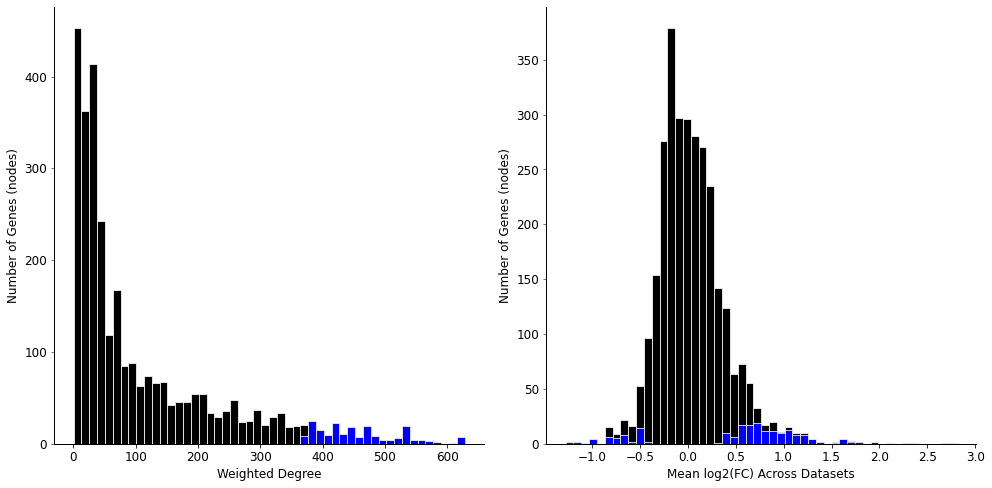

In [19]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#WEIGHTED DEGREE CENTRALITY
n, bins, patches = ax1.hist(ATB_HC_df.weighted_degree , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax1.hist(ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax1.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#Log2(FC)
n, bins, patches = ax2.hist(ATB_HC_df.mean_log2FC , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax2.hist(ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax2.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax2.set_xlabel('Mean log2(FC) Across Datasets' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(14, 7.0)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

#### *Weighted Degree* vs *mean log2(Fold Change)*

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


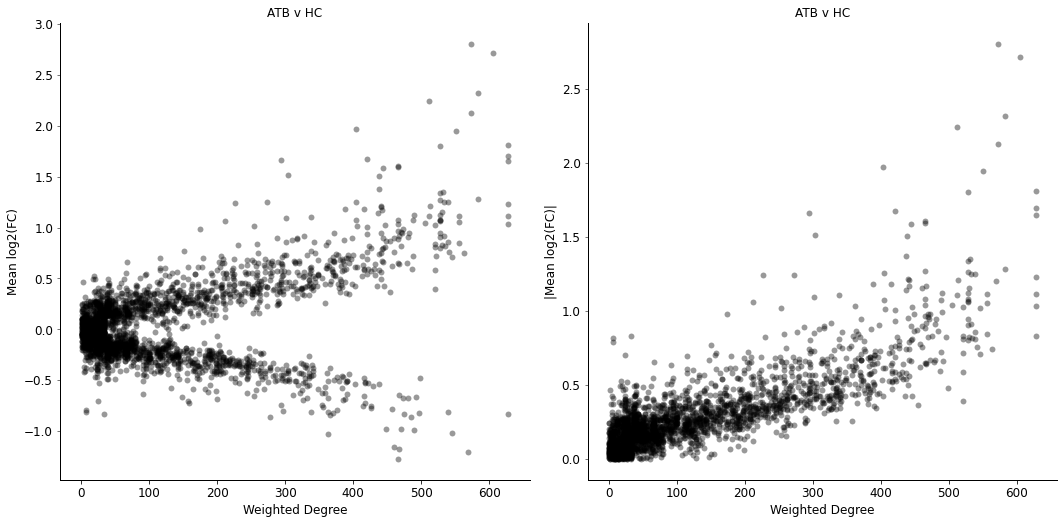

In [20]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#PLOT 1: Log2(FC) vs. weighted degree
ax1.scatter(ATB_HC_df.weighted_degree, ATB_HC_df.mean_log2FC , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax1.set_title('ATB v HC', fontsize = 12, color = 'k')
ax1.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#PLOT 2: absolute(Log2(FC)) vs. weighted degree
ax2.scatter(ATB_HC_df.weighted_degree, abs(ATB_HC_df.mean_log2FC) , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax2.set_title('ATB v HC', fontsize = 12, color = 'k')
ax2.set_ylabel('|Mean log2(FC)|', fontsize = 12, color = 'k')
ax2.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(15, 7.5)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

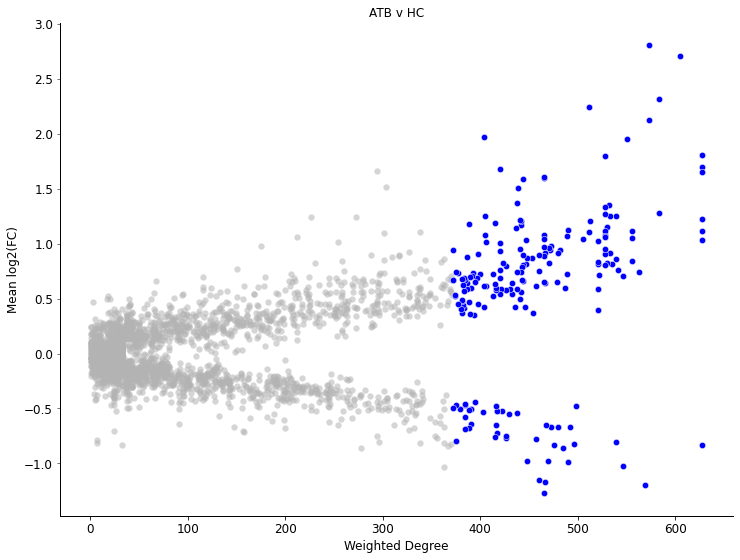

In [21]:
fig , ax = plt.subplots()

ax.scatter(ATB_HC_df.weighted_degree, ATB_HC_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 40 , alpha = 0.55)

#highlight the top N nodes by weighted degree
ax.scatter(ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 40 , alpha = 1.0)

ax.set_title('ATB v HC', fontsize = 12, color = 'k')
ax.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.tick_params(labelcolor = 'k')
ax.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(10.5, 8.0)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [22]:
ATB_HC_df.sort_values(by = ['weighted_degree','mean_log2FC'] , ascending = [False,False]).head(n = 20)

,mean_log2FC,weighted_degree
GBP5,1.808402,627.800000
IFITM3,1.698333,627.800000
AIM2,1.649580,627.800000
SAMD9L,1.229418,627.800000
CARD16,1.112804,627.800000
SORT1,1.031665,627.800000
PIK3IP1,-0.833861,627.800000
ANKRD22,2.713292,604.800000
BATF2,2.319556,583.066667
SLC6A12,1.281194,583.066667


In [23]:
ATB_HC_df.sort_values(by = ['mean_log2FC','weighted_degree'] , ascending = [False,False]).tail(n = 20)

,mean_log2FC,weighted_degree
TXK,-0.812627,338.000000
KLHL3,-0.812915,362.333333
CCL7,-0.814554,6.600000
CXCR3,-0.821809,370.266667
IL7R,-0.822723,495.933333
OLR1,-0.830470,32.800000
SPOCK2,-0.832186,475.266667
PIK3IP1,-0.833861,627.800000
FLNB,-0.844765,366.400000
CXCR5,-0.855985,277.466667


### [2.2] ATB v LTBI

In [24]:
ATB_LTBI_df = pd.DataFrame(index = mean_logFC_ATB_LTBI_series.index)
ATB_LTBI_df['mean_log2FC'] = mean_logFC_ATB_LTBI_series.values
ATB_LTBI_df['weighted_degree'] = weighted_deg_ATB_LTBI_series[mean_logFC_ATB_LTBI_series.index].values

#### Distributions of *Weighted Degree* and *mean log2(Fold Change)*

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


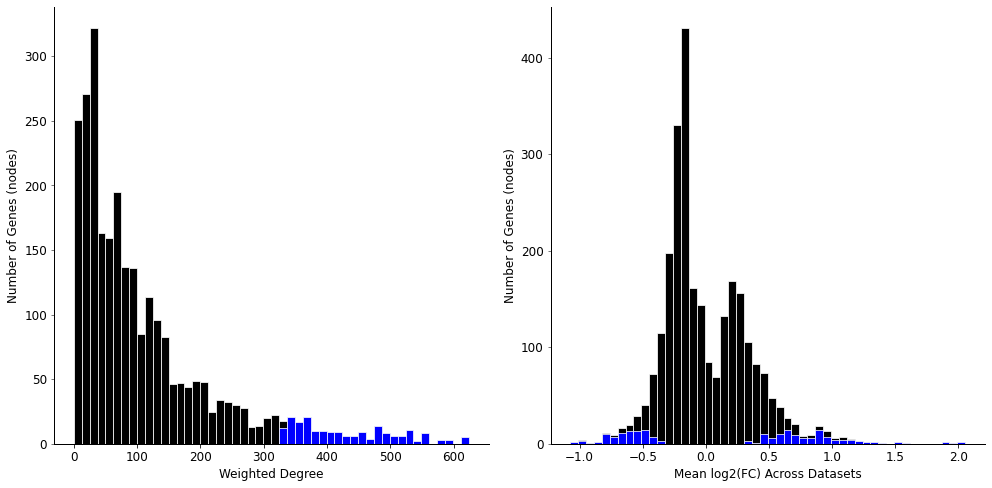

In [25]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#WEIGHTED DEGREE CENTRALITY
n, bins, patches = ax1.hist(ATB_LTBI_df.weighted_degree , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax1.hist(ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax1.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#Log2(FC)
n, bins, patches = ax2.hist(ATB_LTBI_df.mean_log2FC , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax2.hist(ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax2.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax2.set_xlabel('Mean log2(FC) Across Datasets' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(14, 7.0)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

#### *Weighted Degree* vs *mean log2(Fold Change)*

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


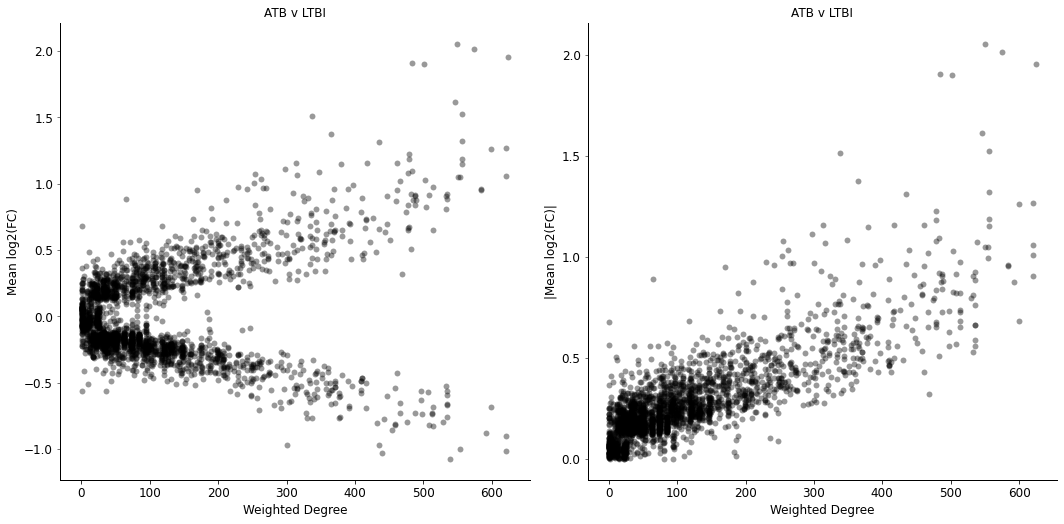

In [26]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#PLOT 1: Log2(FC) vs. weighted degree
ax1.scatter(ATB_LTBI_df.weighted_degree, ATB_LTBI_df.mean_log2FC , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax1.set_title('ATB v LTBI', fontsize = 12, color = 'k')
ax1.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#PLOT 2: absolute(Log2(FC)) vs. weighted degree
ax2.scatter(ATB_LTBI_df.weighted_degree, abs(ATB_LTBI_df.mean_log2FC) , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax2.set_title('ATB v LTBI', fontsize = 12, color = 'k')
ax2.set_ylabel('|Mean log2(FC)|', fontsize = 12, color = 'k')
ax2.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(15, 7.5)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

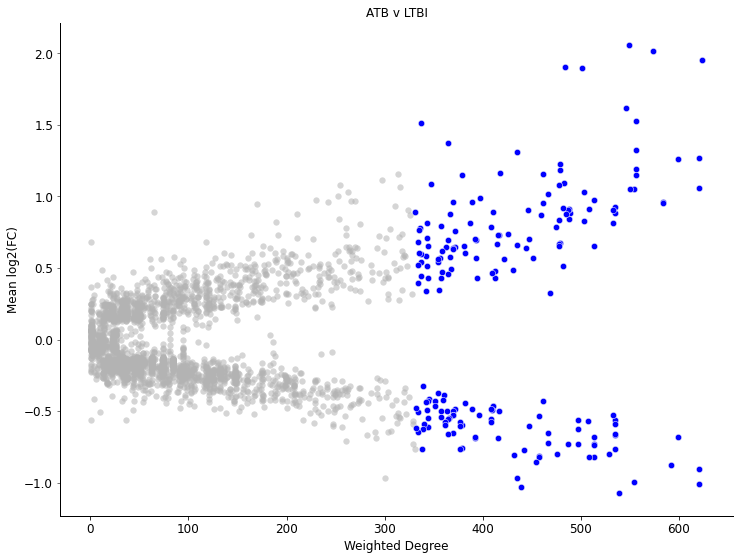

In [27]:
fig , ax = plt.subplots()

ax.scatter(ATB_LTBI_df.weighted_degree, ATB_LTBI_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 40 , alpha = 0.55)

#highlight the top N nodes by weighted degree
ax.scatter(ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 40 , alpha = 1.0)

ax.set_title('ATB v LTBI', fontsize = 12, color = 'k')
ax.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.tick_params(labelcolor = 'k')
ax.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(10.5, 8.0)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [28]:
ATB_LTBI_df.sort_values(by = ['weighted_degree','mean_log2FC'] , ascending = [False,False]).head(n = 20)

,mean_log2FC,weighted_degree
FCGR1B,1.955971,624.0625
FBXO6,1.269424,620.1875
IFITM3,1.059062,620.1875
IL7R,-0.904867,620.1875
CCR7,-1.010705,620.1875
SMARCD3,1.263818,599.0625
SLC38A1,-0.683560,599.0625
ABLIM1,-0.878561,592.2500
VAMP5,0.960502,583.7500
SCO2,0.956709,583.7500


In [29]:
ATB_LTBI_df.sort_values(by = ['mean_log2FC','weighted_degree'] , ascending = [False,False]).tail(n = 20)

,mean_log2FC,weighted_degree
EPHA4,-0.763567,376.9375
P2RY10,-0.765011,337.8750
GRAP,-0.765606,330.5000
TMEM204,-0.769629,442.3125
LEF1,-0.797357,528.8750
CD79A,-0.799379,475.5625
LBH,-0.803565,432.3750
FCRLA,-0.812260,457.9375
GZMK,-0.818300,457.9375
PLEKHA1,-0.819415,507.9375


### [2.3] ATB v OD

In [30]:
ATB_OD_df = pd.DataFrame(index = mean_logFC_ATB_OD_series.index)
ATB_OD_df['mean_log2FC'] = mean_logFC_ATB_OD_series.values
ATB_OD_df['weighted_degree'] = weighted_deg_ATB_OD_series[mean_logFC_ATB_OD_series.index].values

#### Distributions of *Weighted Degree* and *mean log2(Fold Change)*

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


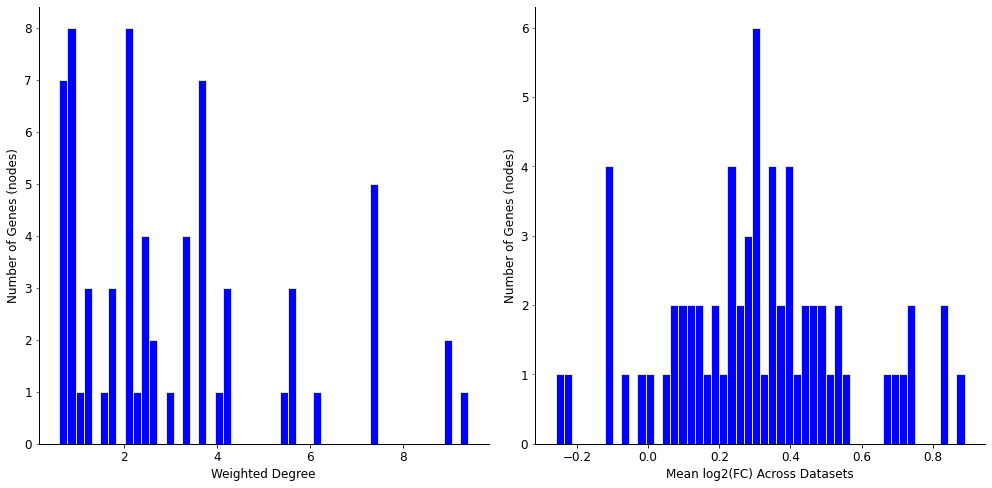

In [31]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#WEIGHTED DEGREE CENTRALITY
n, bins, patches = ax1.hist(ATB_OD_df.weighted_degree , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax1.hist(ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax1.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#Log2(FC)
n, bins, patches = ax2.hist(ATB_OD_df.mean_log2FC , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax2.hist(ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax2.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax2.set_xlabel('Mean log2(FC) Across Datasets' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(14, 7.0)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

#### *Weighted Degree* vs *mean log2(Fold Change)*

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


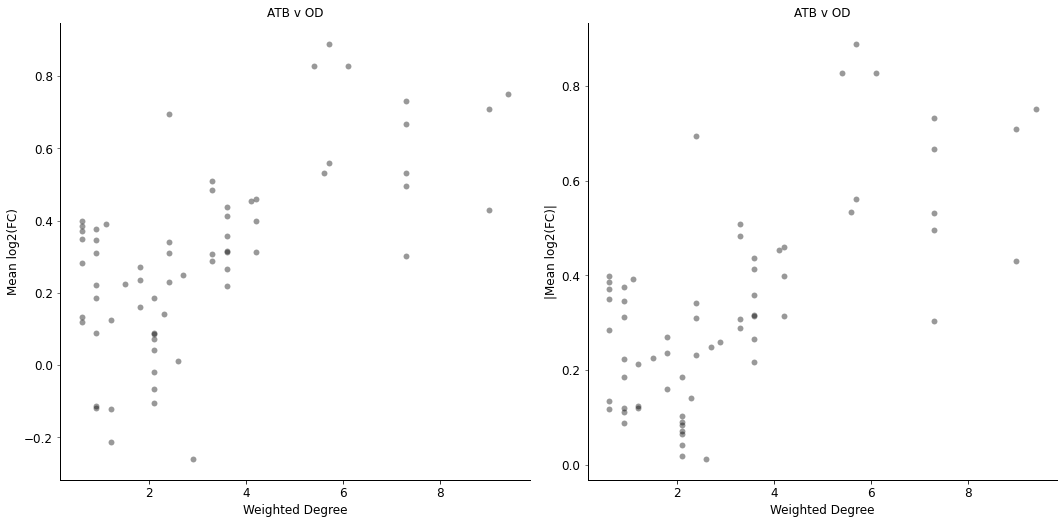

In [32]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#PLOT 1: Log2(FC) vs. weighted degree
ax1.scatter(ATB_OD_df.weighted_degree, ATB_OD_df.mean_log2FC , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax1.set_title('ATB v OD', fontsize = 12, color = 'k')
ax1.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#PLOT 2: absolute(Log2(FC)) vs. weighted degree
ax2.scatter(ATB_OD_df.weighted_degree, abs(ATB_OD_df.mean_log2FC) , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax2.set_title('ATB v OD', fontsize = 12, color = 'k')
ax2.set_ylabel('|Mean log2(FC)|', fontsize = 12, color = 'k')
ax2.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(15, 7.5)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

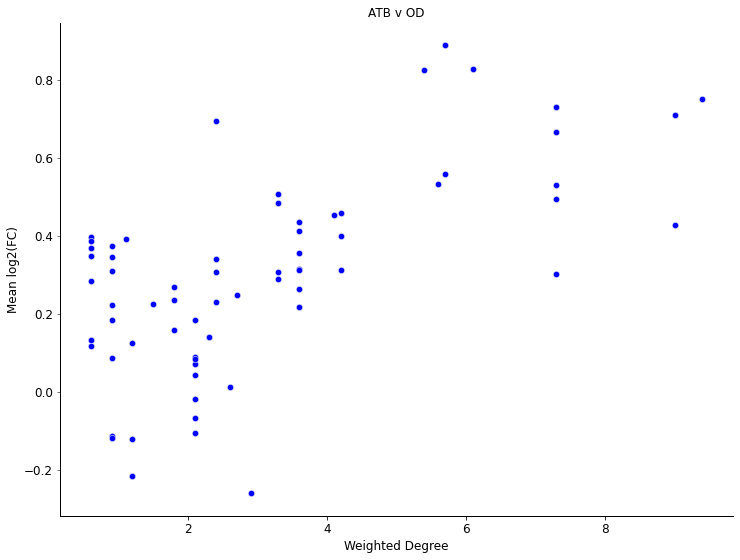

In [33]:
fig , ax = plt.subplots()

ax.scatter(ATB_OD_df.weighted_degree, ATB_OD_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 40 , alpha = 0.55)

#highlight the top N nodes by weighted degree
ax.scatter(ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 40 , alpha = 1.0)

ax.set_title('ATB v OD', fontsize = 12, color = 'k')
ax.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.tick_params(labelcolor = 'k')
ax.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(10.5, 8.0)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [34]:
ATB_OD_df.sort_values(by = ['weighted_degree','mean_log2FC'] , ascending = [False,False]).head(n = 20)

,mean_log2FC,weighted_degree
BATF2,0.751017,9.4
FCGR1A,0.710203,9.0
VAMP5,0.430096,9.0
SERPING1,0.732517,7.3
GBP5,0.667358,7.3
GBP4,0.532321,7.3
GBP1,0.496693,7.3
WARS,0.303513,7.3
ANKRD22,0.828368,6.1
SEPT4,0.889510,5.7


In [35]:
ATB_OD_df.sort_values(by = ['mean_log2FC','weighted_degree'] , ascending = [False,False]).tail(n = 20)

,mean_log2FC,weighted_degree
CLEC5A,0.185099,2.1
DDAH2,0.160208,1.8
TLR5,0.141392,2.3
ADM,0.134489,0.6
FGFBP2,0.124923,1.2
ADCY3,0.118786,0.6
ANXA3,0.089488,2.1
CD3G,0.087762,0.9
GZMH,0.084985,2.1
ADGRG1,0.071262,2.1


## [3] Compare top N nodes *by weighted degree* across networks

In [36]:
top_N_nodes_ATB_HC = set(ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index)
top_N_nodes_ATB_LTBI = set(ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index)
top_N_nodes_ATB_OD = set(ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index)

In [37]:
len(top_N_nodes_ATB_HC)

200

In [38]:
len(top_N_nodes_ATB_LTBI)

200

In [39]:
len(top_N_nodes_ATB_OD)

67

### Function to visualize a set of genes in *mean log2(FC)* vs. *weighted degree* for all networks

In [40]:
def plot_logFC_v_meanlogFC_all_networks(gene_list):
    
    fig = plt.figure(constrained_layout=True)

    gs = GridSpec(1, 3, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])

    #ATB_HC
    ax1.scatter(ATB_HC_df.weighted_degree, ATB_HC_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 25 , alpha = 0.55)

    #filter for nodes in gene list
    gene_list_filter = [gene_i in gene_list for gene_i in ATB_HC_df.index]

    #highlight the top N nodes by weighted degree
    ax1.scatter(ATB_HC_df[gene_list_filter].weighted_degree , ATB_HC_df[gene_list_filter].mean_log2FC , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 25 , alpha = 1.0)

    ax1.set_title('ATB v HC', fontsize = 12, color = 'k')
    ax1.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
    ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.grid(False)
    ax1.tick_params(labelcolor = 'k')
    ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
    ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

    #ATB_LTBI
    ax2.scatter(ATB_LTBI_df.weighted_degree, ATB_LTBI_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 25 , alpha = 0.55)

    #filter for nodes in gene list
    gene_list_filter = [gene_i in gene_list for gene_i in ATB_LTBI_df.index]

    #highlight the top N nodes by weighted degree
    ax2.scatter(ATB_LTBI_df[gene_list_filter].weighted_degree , ATB_LTBI_df[gene_list_filter].mean_log2FC , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 25 , alpha = 1.0)

    ax2.set_title('ATB v LTBI', fontsize = 12, color = 'k')
    ax2.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
    ax2.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.grid(False)
    ax2.tick_params(labelcolor = 'k')
    ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
    ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

    #ATB_OD
    ax3.scatter(ATB_OD_df.weighted_degree, ATB_OD_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 25 , alpha = 0.55)

    #filter for nodes in gene list
    gene_list_filter = [gene_i in gene_list for gene_i in ATB_OD_df.index]

    #highlight the top N nodes by weighted degree
    ax3.scatter(ATB_OD_df[gene_list_filter].weighted_degree , ATB_OD_df[gene_list_filter].mean_log2FC , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 25 , alpha = 1.0)

    ax3.set_title('ATB v OD', fontsize = 12, color = 'k')
    ax3.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
    ax3.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.grid(False)
    ax3.tick_params(labelcolor = 'k')
    ax3.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
    ax3.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

    ################### Plot ###################
    fig = plt.gcf()
    fig.set_size_inches(16.5, 5.5)
    fig.tight_layout()

    #file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
    #plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

    plt.show()

### [3.1] top nodes (genes) in only 1 network

ATB_HC - ATB_LTBI - ATB_OD

In [46]:
ATB_HC_only = top_N_nodes_ATB_HC - top_N_nodes_ATB_LTBI - top_N_nodes_ATB_OD

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_HC_only.pkl', 'wb') as f:
    pickle.dump(list(ATB_HC_only), f)

In [47]:
len(ATB_HC_only)

90

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


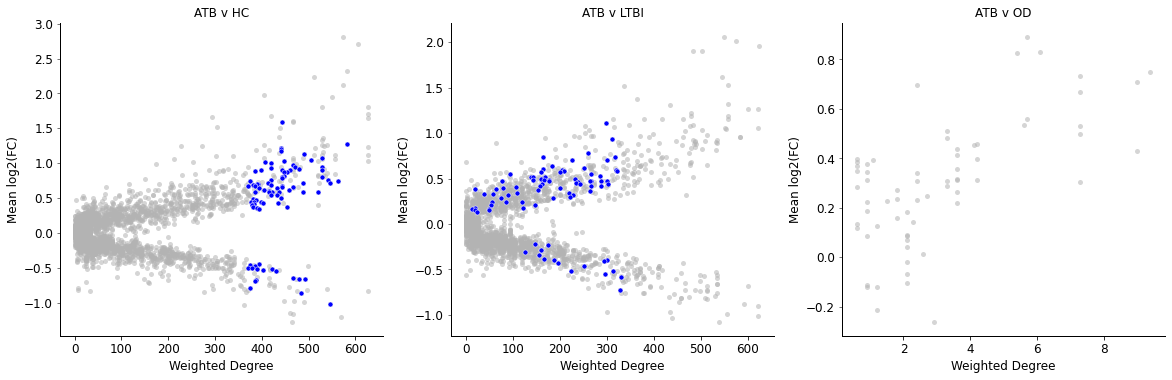

In [48]:
plot_logFC_v_meanlogFC_all_networks(ATB_HC_only)

In [49]:
for gene_i in ATB_HC_only:
    print(gene_i + ', ')

DHRS3, 
SDSL, 
ACTA2, 
LRRK2, 
CD28, 
KIF1B, 
STAT2, 
STAT1, 
GBP3, 
ZNF395, 
LPCAT2, 
SPATS2L, 
BST1, 
PLSCR1, 
ARL4C, 
LYRM1, 
FAS, 
RSAD2, 
DTX3L, 
JAK2, 
TAP2, 
CD5, 
IFIH1, 
SH3YL1, 
ZNF91, 
CDR2, 
ROPN1L, 
MR1, 
STAB1, 
ZNF827, 
LACTB, 
GCH1, 
LTBR, 
IFITM2, 
SLC22A4, 
GPR18, 
SLITRK4, 
RALB, 
STK3, 
KCNJ2, 
RAB20, 
ASPHD2, 
HPCAL4, 
LMO2, 
SRBD1, 
C1QC, 
PSME2, 
FYB, 
TRAFD1, 
PSMB8, 
LIMK2, 
CD19, 
B4GALT5, 
TKTL1, 
TIFA, 
EPB41L3, 
GADD45G, 
TYMP, 
SLC6A12, 
DRAM1, 
APOL6, 
NOD2, 
FFAR2, 
PRRG4, 
MYOF, 
BLVRA, 
SLAMF8, 
FGL2, 
STMN3, 
DDX58, 
MAPK14, 
DDX60, 
UBE2L6, 
PSMB9, 
C5, 
NAIP, 
MTHFD2, 
TLR7, 
MICU1, 
OCIAD2, 
OSCAR, 
PIK3AP1, 
HCAR2, 
DDIAS, 
IFI16, 
CD14, 
HCAR3, 
LMNB1, 
TNFRSF25, 
TSEN54, 


ATB_LTBI - ATB_HC - ATB_OD

In [50]:
ATB_LTBI_only = top_N_nodes_ATB_LTBI - top_N_nodes_ATB_HC - top_N_nodes_ATB_OD

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_LTBI_only.pkl', 'wb') as f:
    pickle.dump(list(ATB_LTBI_only), f)

In [51]:
len(ATB_LTBI_only)

93

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


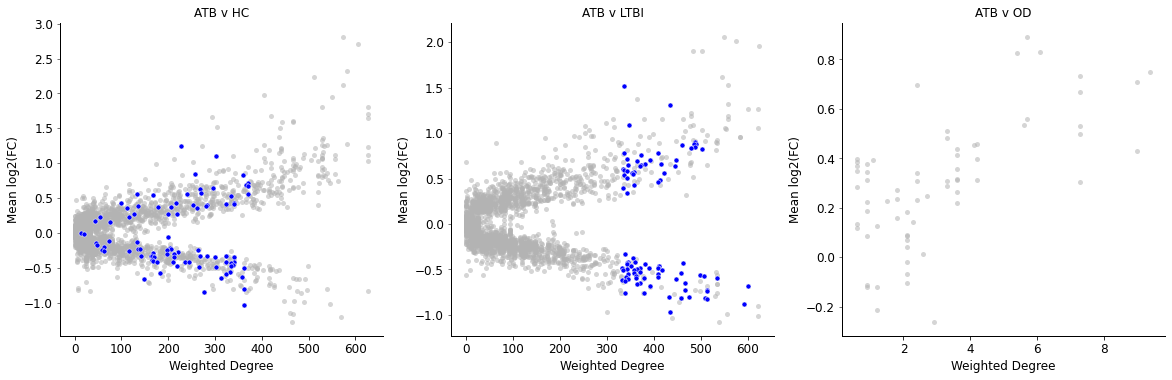

In [52]:
plot_logFC_v_meanlogFC_all_networks(ATB_LTBI_only)

In [53]:
for gene_i in ATB_LTBI_only:
    print(gene_i + ', ')

DEFA3, 
LRG1, 
TCN1, 
HIST1H4H, 
SECTM1, 
ZNF831, 
PRKCH, 
TXN, 
CAMK4, 
PYHIN1, 
ITGB7, 
IFITM1, 
LRRN3, 
PPP1R16B, 
LILRA5, 
SIGLEC5, 
TRAF5, 
CXCR5, 
CDC25B, 
H2AFJ, 
GBP6, 
EOMES, 
DYRK2, 
HIST2H2BE, 
LY9, 
LAX1, 
CD2, 
KLHDC8B, 
SAMD3, 
LBH, 
KLF12, 
KLRG1, 
RAB24, 
FOLR3, 
PLBD1, 
IL2RB, 
UBASH3A, 
NMT2, 
SPIB, 
KLHL3, 
SLAMF6, 
CD79A, 
CD8A, 
HK3, 
P2RY10, 
MATK, 
MMP9, 
RHOH, 
SLC38A1, 
KIAA0355, 
FCRLA, 
ATP8B2, 
CD36, 
DENND2D, 
GZMK, 
HIST1H1C, 
ZAP70, 
S100A8, 
TGFBR3, 
SYTL2, 
DEFA4, 
PLEKHF1, 
ITGA2B, 
OASL, 
PRPS1, 
SH2D1A, 
ITPR3, 
ANKRD9, 
ASGR2, 
IFI27, 
CLEC1B, 
RORA, 
KIAA1147, 
CBLB, 
CD79B, 
PLEKHA1, 
ST6GAL1, 
CLEC4E, 
CA4, 
ZNF529, 
ALPL, 
PRKCQ, 
ABLIM1, 
ITM2A, 
GOLGA8B, 
MSRB2, 
RNF125, 
CLEC12A, 
CYSTM1, 
SLPI, 
BCL11B, 
LCN2, 
HSPA6, 


ATB_OD - ATB_HC - ATB_LTBI

In [54]:
ATB_OD_only = top_N_nodes_ATB_OD - top_N_nodes_ATB_HC - top_N_nodes_ATB_LTBI

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_OD_only.pkl', 'wb') as f:
    pickle.dump(list(ATB_OD_only), f)

In [55]:
len(ATB_OD_only)

25

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


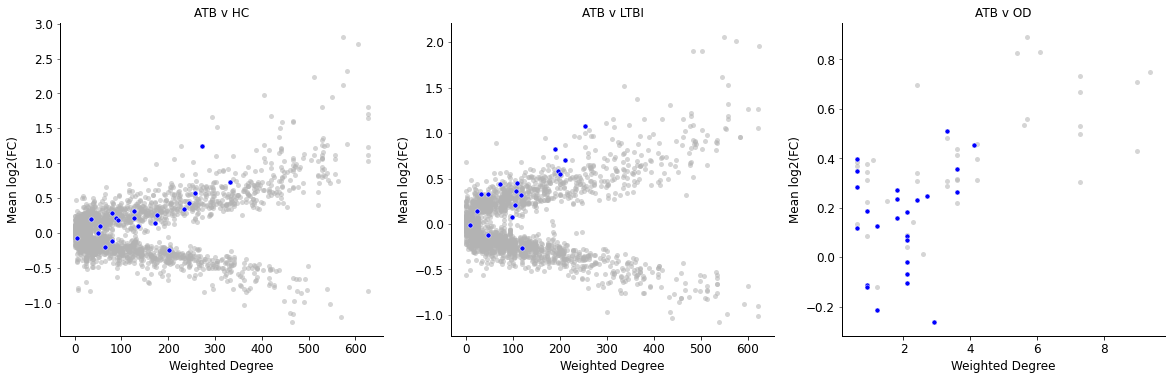

In [56]:
plot_logFC_v_meanlogFC_all_networks(ATB_OD_only)

### [3.2] top nodes (genes) in 2 networks

(ATB_HC $\cap$ ATB_LTBI) - ATB_OD

In [57]:
ATB_HC_and_ATB_LTBI = top_N_nodes_ATB_HC.intersection(top_N_nodes_ATB_LTBI) - top_N_nodes_ATB_OD

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_HC_and_ATB_LTBI.pkl', 'wb') as f:
    pickle.dump(list(ATB_HC_and_ATB_LTBI), f)

In [58]:
len(ATB_HC_and_ATB_LTBI)

71

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


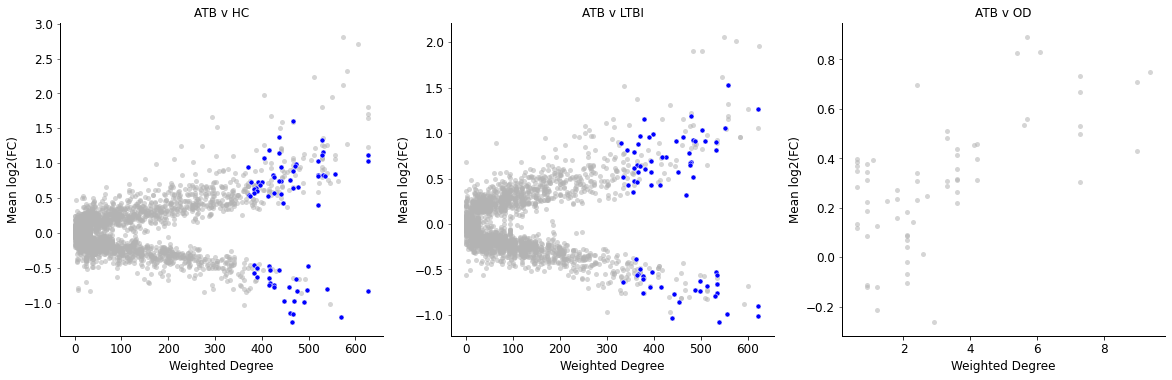

In [59]:
plot_logFC_v_meanlogFC_all_networks(ATB_HC_and_ATB_LTBI)

In [60]:
for gene_i in ATB_HC_and_ATB_LTBI:
    print(gene_i + ', ')

FBXO6, 
SQRDL, 
IFI44, 
TRIM22, 
CD27, 
CAMP, 
FAM102A, 
GBP2, 
MAP4K1, 
HPSE, 
KREMEN1, 
TC2N, 
TNFAIP6, 
KCNJ15, 
CRISPLD2, 
ITK, 
TNFSF13B, 
GPR183, 
CD96, 
LEF1, 
CLEC4D, 
SKAP1, 
SLC26A8, 
HP, 
CASP1, 
CARD16, 
CCR7, 
TMEM204, 
IL1B, 
SMCO4, 
TNFSF10, 
CD6, 
CEACAM3, 
ZNF438, 
CNIH4, 
STX11, 
SGK223, 
NELL2, 
ATP6V0E2, 
SORT1, 
S1PR1, 
MSRB1, 
TRABD2A, 
LHFPL2, 
LY96, 
PIK3IP1, 
RTP4, 
SPOCK2, 
IFI35, 
PLAUR, 
TAP1, 
KLRB1, 
GLRX, 
ID3, 
ELANE, 
IL7R, 
PARP14, 
DYNLT1, 
SIPA1L2, 
GK, 
PASK, 
ETS1, 
GYG1, 
MCEMP1, 
EPHA4, 
DYSF, 
LDLRAP1, 
FLVCR2, 
VPS9D1, 
FCMR, 
CD247, 


(ATB_HC $\cap$ ATB_OD) - ATB_LTBI

In [61]:
ATB_HC_and_ATB_OD = top_N_nodes_ATB_HC.intersection(top_N_nodes_ATB_OD) - top_N_nodes_ATB_LTBI

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_HC_and_ATB_OD.pkl', 'wb') as f:
    pickle.dump(list(ATB_HC_and_ATB_OD), f)

In [62]:
len(ATB_HC_and_ATB_OD)

6

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


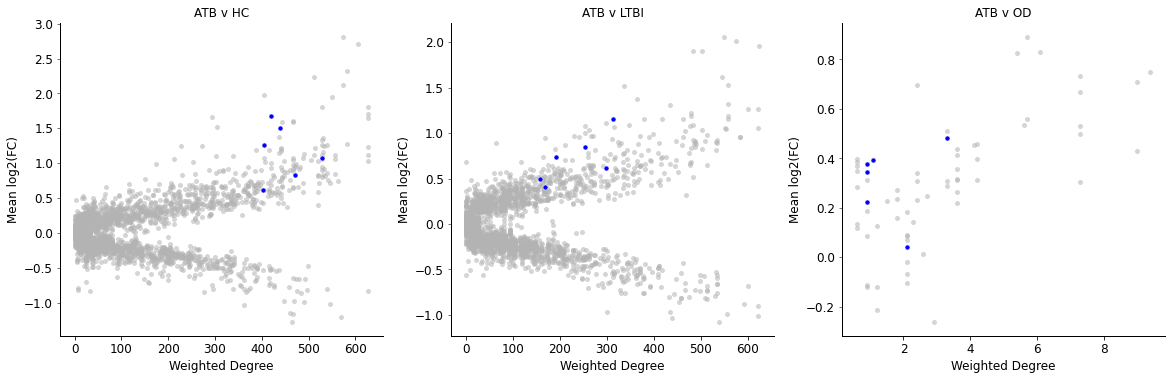

In [63]:
plot_logFC_v_meanlogFC_all_networks(ATB_HC_and_ATB_OD)

(ATB_LTBI $\cap$ ATB_OD) - ATB_HC

In [64]:
ATB_LTBI_and_ATB_OD = top_N_nodes_ATB_LTBI.intersection(top_N_nodes_ATB_OD) - top_N_nodes_ATB_HC

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_LTBI_and_ATB_OD.pkl', 'wb') as f:
    pickle.dump(list(ATB_LTBI_and_ATB_OD), f)

In [65]:
len(ATB_LTBI_and_ATB_OD)

3

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


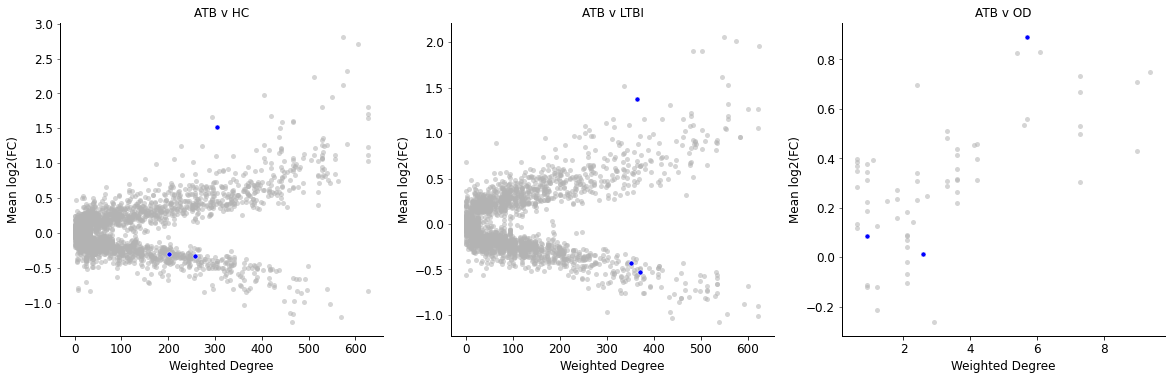

In [66]:
plot_logFC_v_meanlogFC_all_networks(ATB_LTBI_and_ATB_OD)

### [3.3] top nodes (genes) in all 3 networks

ATB_LTBI $\cap$ ATB_OD $\cap$ ATB_HC

In [67]:
ATB_HC_and_ATB_LTBI_and_ATB_OD = top_N_nodes_ATB_HC.intersection(top_N_nodes_ATB_LTBI.intersection(top_N_nodes_ATB_OD))

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_HC_and_ATB_LTBI_and_ATB_OD.pkl', 'wb') as f:
    pickle.dump(list(ATB_HC_and_ATB_LTBI_and_ATB_OD), f)

In [68]:
len(ATB_HC_and_ATB_LTBI_and_ATB_OD)

33

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


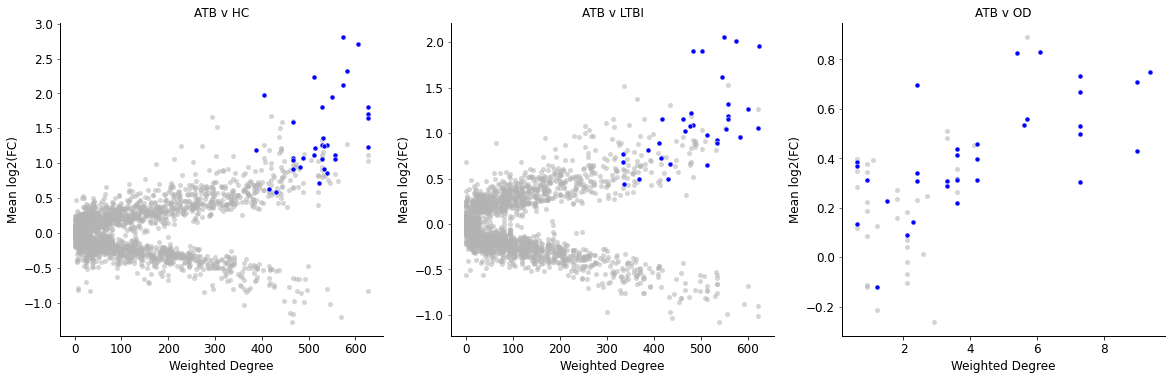

In [69]:
plot_logFC_v_meanlogFC_all_networks(ATB_HC_and_ATB_LTBI_and_ATB_OD)

In [70]:
for gene_i in ATB_HC_and_ATB_LTBI_and_ATB_OD:
    print(gene_i + ', ')

IFIT2, 
ANXA3, 
SAMD9L, 
TIMM10, 
WARS, 
C1QB, 
IFITM3, 
FCGR1B, 
IFIT3, 
TLR5, 
VAMP5, 
P2RY14, 
GBP5, 
GBP1, 
LAP3, 
EPSTI1, 
XAF1, 
CEACAM1, 
S100A12, 
PSTPIP2, 
ANKRD22, 
DUSP3, 
ADM, 
CASP5, 
GBP4, 
SCO2, 
AIM2, 
SERPING1, 
SMARCD3, 
BATF2, 
POLB, 
FAM26F, 
FCGR1A, 


### [3.4] How do other *gene signatures* compare?

#### Zak 2016 Lancet (16-gene signature)

In [91]:
zak_et_al_2016 = ['ANKRD22','APOL1','BATF2','ETV7','FCGR1A','FCGR1B','GBP1','GBP2','GBP4','GBP5','SCARF1','SEPT4','SERPING1','STAT1','TAP1','TRAFD1']

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


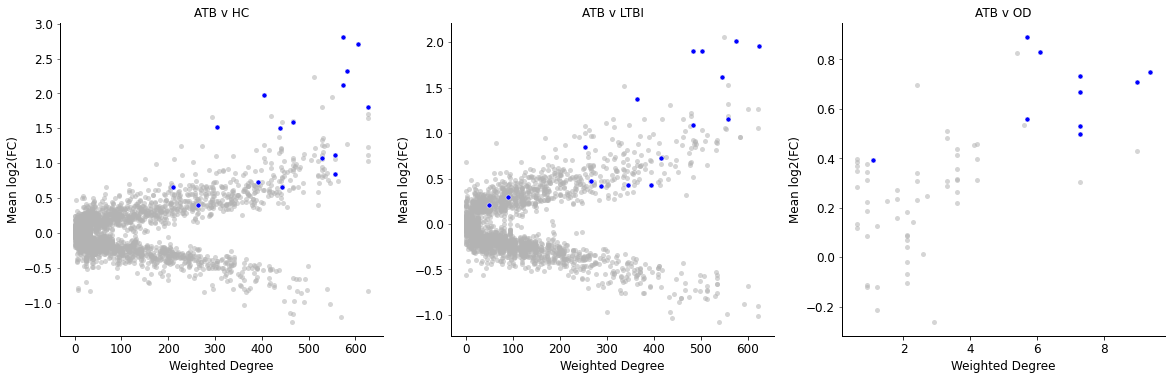

In [92]:
plot_logFC_v_meanlogFC_all_networks(zak_et_al_2016)

#### Sweeney 2016 Lancet Respiratory (3-gene signature)

In [93]:
sweeney_et_al_2016 = ['GBP5','DUSP3','KLF2']

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


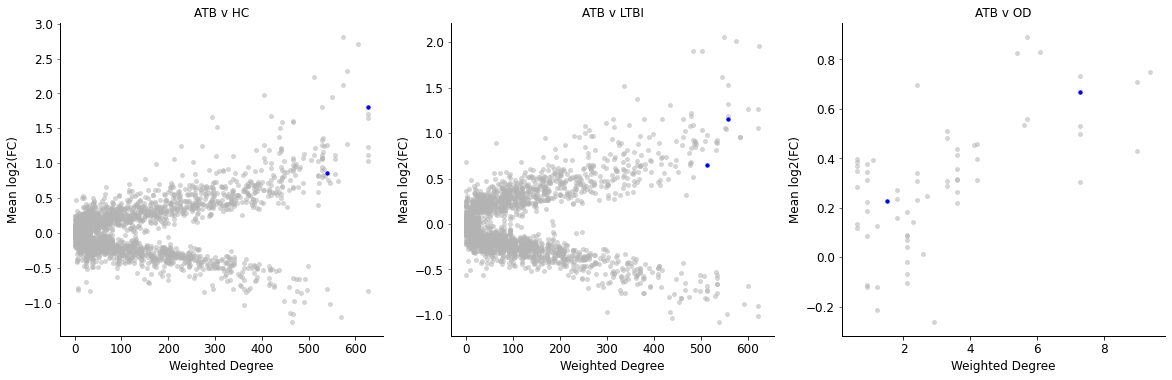

In [94]:
plot_logFC_v_meanlogFC_all_networks(sweeney_et_al_2016)

**GBP5** and **DUSP3** are in all networks; **KLF2** is in none of the networks

#### Sambarey 2016 EBioMedicine (10-gene signature)

In [95]:
sambarey_et_al_2016 = ['FCGR1A','HK3','RAB13','RBBP8','IFI44L','TIMM10','BCL6','SMARCD3','CYP4F3','SLPI']

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


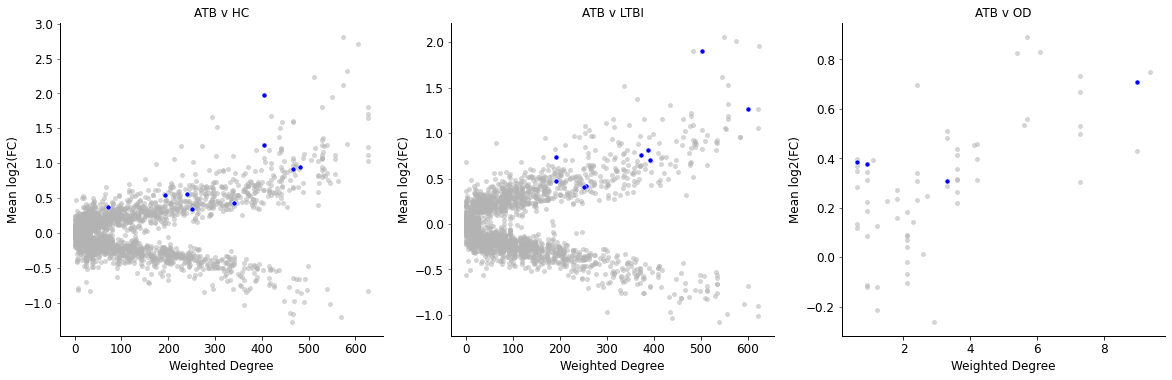

In [96]:
plot_logFC_v_meanlogFC_all_networks(sambarey_et_al_2016)

#### Verhagen 2013 BMC Genomics (10-gene signature)

In [97]:
verhagen_et_al_2013 = ['CHRM2','AMPH','SNX17','PIGC','S100P','TAS2R46','STYXL1','HBD','GLDC','ACOT7']

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


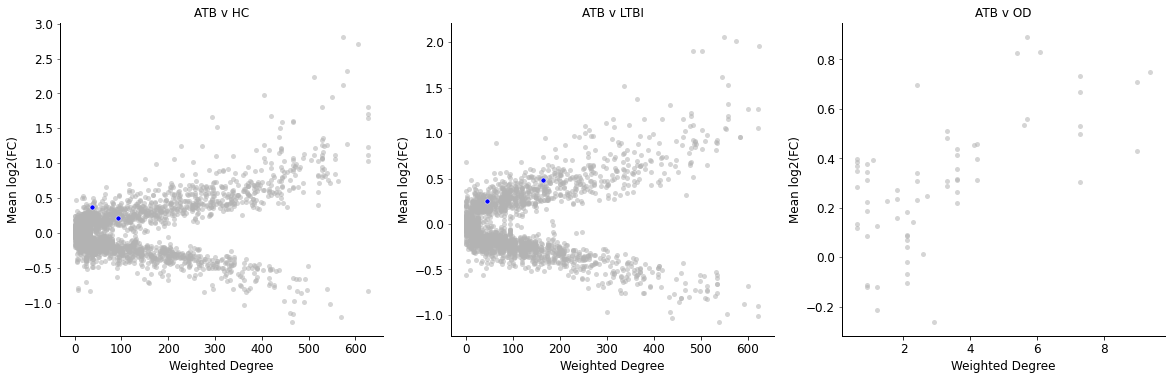

In [98]:
plot_logFC_v_meanlogFC_all_networks(verhagen_et_al_2013)

#### Leong 2018 Tuberculosis (24-gene signature)

In [99]:
leong_et_al_2018 = ['HIRIP3','LNX2','METAP1','PPCS','SPTSSA','PLEKHA1','DAPP1','TMEM63A','SIN3A','WSB2','ANXA5','SERPING1','LBH','CPVL','S1PR1','PLAC8','TXN','VPS29','BATF2','RAB34','DNAJC1','HPS4','EXD2','SWSAP1']

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


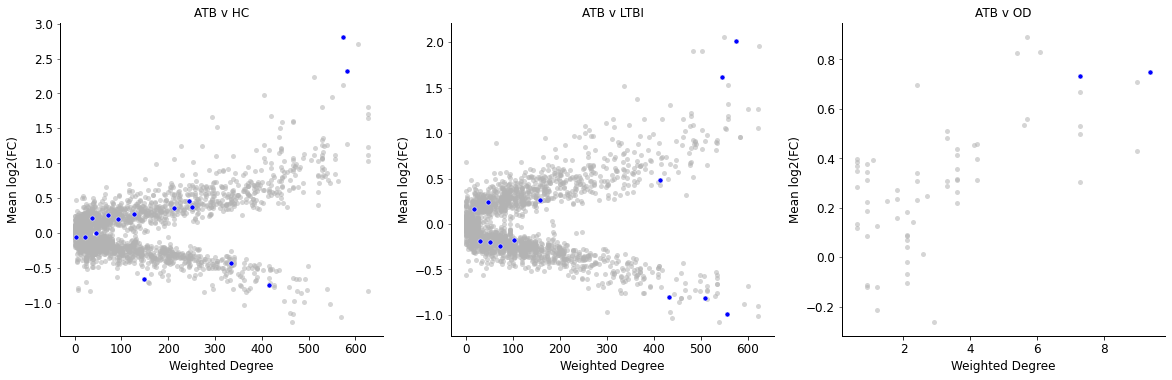

In [100]:
plot_logFC_v_meanlogFC_all_networks(leong_et_al_2018)

#### Maertzdorf 2016 EMBO Molecular Medicine (15-gene signature)

In [101]:
maertzdorf_et_al_2016 = ['CNIH4','GBP1','P2RY14','PCNXL2','CD274','FCGR1C','GBP5','S100A8','ID3','DHRS9','FBXL5','FAM26F','BATF2','CD96','FCGR1A']

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


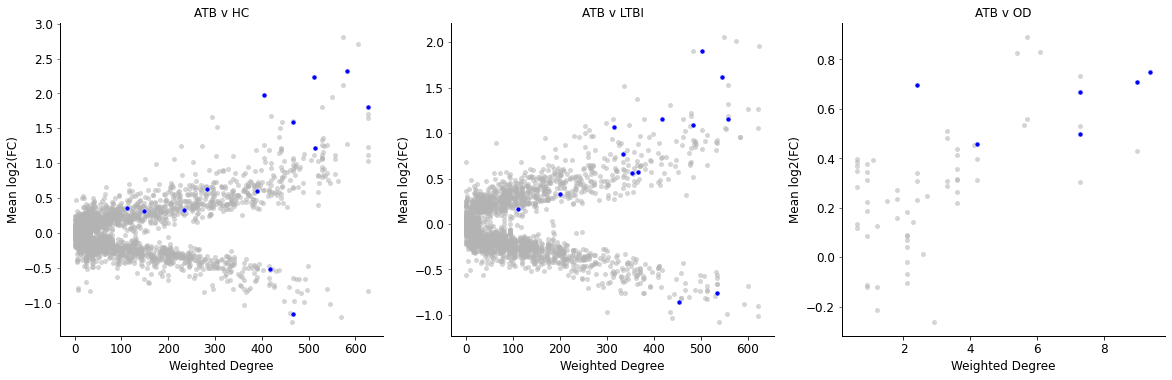

In [102]:
plot_logFC_v_meanlogFC_all_networks(maertzdorf_et_al_2016)

## [5] Compare Weighted Degree *between* networks

### [5.1] Normalize the weighted degrees for each network by the number of nodes in each network

In [103]:
weighted_deg_ATB_HC_series = weighted_deg_ATB_HC_series / float(len(G_ATB_HC.nodes()))
weighted_deg_ATB_LTBI_series = weighted_deg_ATB_LTBI_series / float(len(G_ATB_LTBI.nodes()))
weighted_deg_ATB_OD_series = weighted_deg_ATB_OD_series / float(len(G_ATB_OD.nodes()))

#### Compare top N genes (by weighted degrees) from each network

In [104]:
top_N_genes_ATB_HC = ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index
top_N_genes_ATB_LTBI = ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index
top_N_genes_ATB_OD = ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index

#get list of genes present in at least 1 network
gene_list = list(set(top_N_genes_ATB_HC).union(set(top_N_genes_ATB_LTBI).union(top_N_genes_ATB_OD)))

#### Create dataframe to compare (normalized) weighted degree from each network

In [105]:
weighted_deg_df = pd.DataFrame(index = gene_list)

#rename series
weighted_deg_ATB_HC_series.name = 'ATB_HC'
weighted_deg_ATB_LTBI_series.name = 'ATB_LTBI'
weighted_deg_ATB_OD_series.name = 'ATB_OD'

#merge series for different networks to dataframe
weighted_deg_df = weighted_deg_df.merge(pd.DataFrame(weighted_deg_ATB_HC_series) , how = 'left' , left_index = True , right_index = True)
weighted_deg_df = weighted_deg_df.merge(pd.DataFrame(weighted_deg_ATB_LTBI_series) , how = 'left' , left_index = True , right_index = True)
weighted_deg_df = weighted_deg_df.merge(pd.DataFrame(weighted_deg_ATB_OD_series) , how = 'left' , left_index = True , right_index = True)

#replace all NaN values with 0's
weighted_deg_df.fillna(value = 0.0 , inplace = True)

In [106]:
np.shape(weighted_deg_df)

(321, 3)

In [107]:
weighted_deg_df

,ATB_HC,ATB_LTBI,ATB_OD
FOLR3,0.033100,0.128254,0.000000
GBP5,0.208918,0.208404,0.108955
CLEC4D,0.156495,0.159597,0.000000
ITM2A,0.015840,0.129190,0.000000
RORA,0.070882,0.128979,0.000000
...,...,...,...
NOD2,0.152235,0.120318,0.000000
SH3YL1,0.126278,0.055150,0.000000
KLHL3,0.120577,0.124415,0.000000
ZNF395,0.124925,0.059761,0.000000


### [5.2] Agglomerative Clustering of genes by (normalized) weighted degrees

In [108]:
norm_weighted_deg_across_networks_df = weighted_deg_df.loc[: , ['ATB_HC','ATB_LTBI','ATB_OD']]

In [109]:
#cluster
gene_weighted_deg_link = fastcluster.linkage(norm_weighted_deg_across_networks_df, method='ward', metric='euclidean')

#get the new order of the genes
gene_order = hier.leaves_list(gene_weighted_deg_link)

#re-order the pairwise SNP distance matrix according to the new clustering order
reordered_data_subset = norm_weighted_deg_across_networks_df.values[gene_order, :]

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


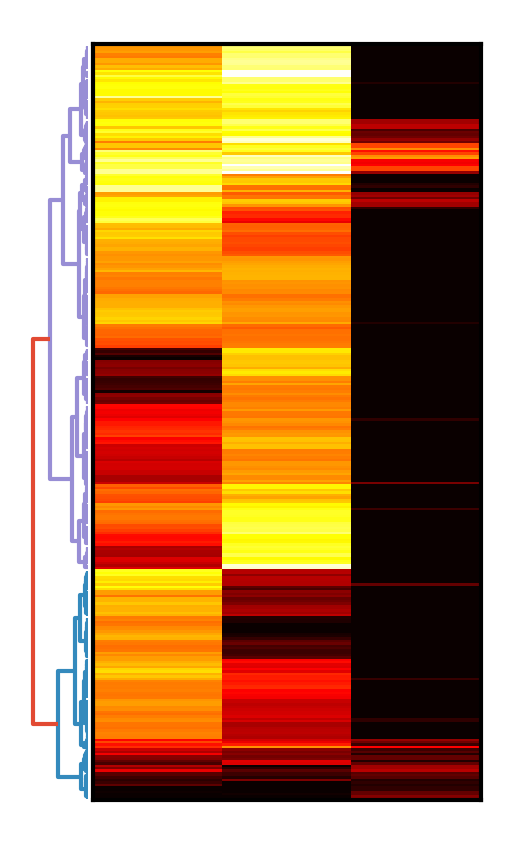

In [110]:
fig = plt.figure(figsize=(2, 4), dpi=300)
gs = GridSpec(3, 3,
           width_ratios=[1.5,10,0.25],
           height_ratios=[1.5,10,0.25],
           wspace=0.03,
           hspace=0.03)


ax2 = fig.add_subplot(gs[1,0], frameon=False)
Z2 = dendrogram(Z=gene_weighted_deg_link, color_threshold=None, leaf_rotation=45, no_labels = True , orientation='left', ax=ax2) # adding/removing the axes
ax2.set_xticks([])
#ax2.set_yticks([])

axmatrix = fig.add_subplot(gs[1,1])
#norm=mpl.colors.Normalize(vmin=0, vmax=40)
im = axmatrix.matshow(reordered_data_subset, aspect='auto', origin='lower', cmap=plt.cm.hot, interpolation='none')

#ax_cbar = fig.add_subplot(gs[1,2])
#cbar = plt.colorbar(im , cax = ax_cbar)
#cbar.set_label('Gene Edge Weight' , rotation = -90, va='bottom' , fontsize = 9)

axmatrix.set_xticks([])
axmatrix.set_yticks([])

fig.tight_layout()
#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/FOR_CHANG_pairwise_SNP_distance/figures/isolates_genetic_aggl_clustered.pdf'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

### [5.3] Compare (normalized) weigted degrees between networks

In [111]:
ATB_HC_minus_ATB_LTBI_deg_series = weighted_deg_df.ATB_HC - weighted_deg_df.ATB_LTBI
ATB_HC_minus_ATB_OD_deg_series = weighted_deg_df.ATB_HC - weighted_deg_df.ATB_OD
ATB_LTBI_minus_ATB_OD_deg_series = weighted_deg_df.ATB_LTBI - weighted_deg_df.ATB_OD

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


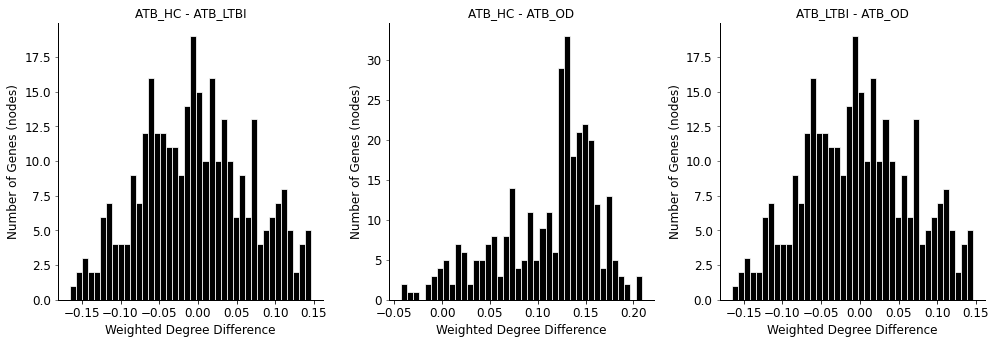

In [112]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

#ATB_HC - ATB_LTBI
ax1.hist(ATB_HC_minus_ATB_LTBI_deg_series , bins = 40, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax1.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree Difference' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
ax1.set_title('ATB_HC - ATB_LTBI' , fontsize = 12, color = 'k')

#ATB_HC - ATB_OD
ax2.hist(ATB_HC_minus_ATB_OD_deg_series , bins = 40, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax2.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax2.set_xlabel('Weighted Degree Difference' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
ax2.set_title('ATB_HC - ATB_OD' , fontsize = 12, color = 'k')

#ATB_LTBI - ATB_OD
ax3.hist(ATB_HC_minus_ATB_LTBI_deg_series , bins = 40, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax3.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax3.set_xlabel('Weighted Degree Difference' , fontsize = 12, color = 'k')

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.grid(False)
ax3.tick_params(labelcolor = 'k')
ax3.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax3.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
ax3.set_title('ATB_LTBI - ATB_OD' , fontsize = 12, color = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(14, 5.0)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

### ATB_HC - ATB_LTBI

In [113]:
ATB_HC_minus_ATB_LTBI_deg_series.sort_values(ascending = False).head(n = 20)

TLR7       0.146122
SLITRK4    0.141915
MICU1      0.140128
FAS        0.138502
FGL2       0.138490
DHRS3      0.134438
MR1        0.134199
PSMB8      0.132490
SRBD1      0.132242
FYB        0.126744
STAB1      0.123405
BST1       0.121892
GBP3       0.121779
IFI16      0.119859
DDX58      0.116572
STAT2      0.116054
STK3       0.114497
LACTB      0.114280
C5         0.113224
SPATS2L    0.112219
dtype: float64

In [114]:
ATB_HC_minus_ATB_LTBI_deg_series.sort_values(ascending = False).tail(n = 20)

ITM2A      -0.113350
GOLGA8B    -0.115981
MMP9       -0.116045
DEFA4      -0.118593
RNF125     -0.120651
CD79A      -0.121718
TCN1       -0.122858
SIGLEC5    -0.123895
CLEC1B     -0.124531
ANKRD9     -0.124724
DYRK2      -0.131172
ALPL       -0.132535
BCL11B     -0.137329
SYTL2      -0.138071
EOMES      -0.146571
KLRG1      -0.147048
ABLIM1     -0.148760
HIST1H1C   -0.151607
TGFBR3     -0.153066
SLC38A1    -0.165466
dtype: float64

In [115]:
genes_high_weight_deg_ATB_HC_list = list(ATB_HC_minus_ATB_LTBI_deg_series.sort_values(ascending = False).head(n = 20).index)
genes_high_weight_deg_ATB_LTBI_list = list(ATB_HC_minus_ATB_LTBI_deg_series.sort_values(ascending = False).tail(n = 20).index)
genes_high_weight_deg_ATB_HC_and_ATB_LTBI_list = list(ATB_HC_minus_ATB_LTBI_deg_series[[(weighted_deg_df.ATB_HC[gene_i] >= 0.17) and (weighted_deg_df.ATB_LTBI[gene_i] >= 0.17) for gene_i in ATB_HC_minus_ATB_LTBI_deg_series.index]].index)

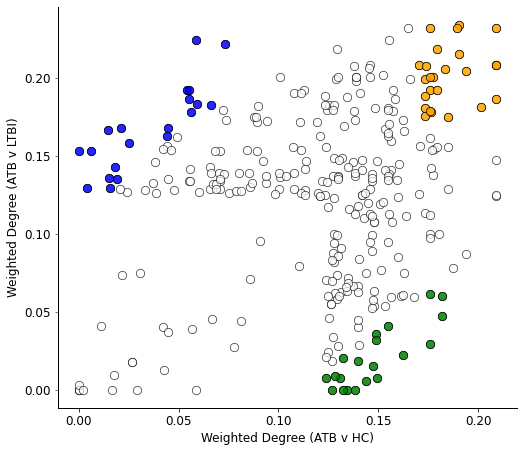

In [116]:
fig , ax = plt.subplots()

ax.scatter(weighted_deg_df.ATB_HC, weighted_deg_df.ATB_LTBI , color = 'white' , linewidth=0.75 , edgecolor = 'black' , s = 70 , alpha = 0.75)
ax.scatter(weighted_deg_df.ATB_HC[[gene_i in genes_high_weight_deg_ATB_HC_list for gene_i in weighted_deg_df.index]], weighted_deg_df.ATB_LTBI[[gene_i in genes_high_weight_deg_ATB_HC_list for gene_i in weighted_deg_df.index]] , color = 'green' , linewidth=0.75 , edgecolor = 'black' , s = 70 , alpha = 0.85)
ax.scatter(weighted_deg_df.ATB_HC[[gene_i in genes_high_weight_deg_ATB_LTBI_list for gene_i in weighted_deg_df.index]], weighted_deg_df.ATB_LTBI[[gene_i in genes_high_weight_deg_ATB_LTBI_list for gene_i in weighted_deg_df.index]] , color = 'blue' , linewidth=0.75 , edgecolor = 'black' , s = 70 , alpha = 0.85)
ax.scatter(weighted_deg_df.ATB_HC[[gene_i in genes_high_weight_deg_ATB_HC_and_ATB_LTBI_list for gene_i in weighted_deg_df.index]], weighted_deg_df.ATB_LTBI[[gene_i in genes_high_weight_deg_ATB_HC_and_ATB_LTBI_list for gene_i in weighted_deg_df.index]] , color = 'orange' , linewidth=0.75 , edgecolor = 'black' , s = 70 , alpha = 0.85)

#ax.set_title('ATB v LTBI', fontsize = 12, color = 'k')
ax.set_ylabel('Weighted Degree (ATB v LTBI)', fontsize = 12, color = 'k')
ax.set_xlabel('Weighted Degree (ATB v HC)' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.tick_params(labelcolor = 'k')
ax.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(7.5, 6.5)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [117]:
len(genes_high_weight_deg_ATB_HC_list)

20

In [118]:
for gene_i in genes_high_weight_deg_ATB_HC_list:
    print(gene_i + ', ')

TLR7, 
SLITRK4, 
MICU1, 
FAS, 
FGL2, 
DHRS3, 
MR1, 
PSMB8, 
SRBD1, 
FYB, 
STAB1, 
BST1, 
GBP3, 
IFI16, 
DDX58, 
STAT2, 
STK3, 
LACTB, 
C5, 
SPATS2L, 


In [119]:
len(genes_high_weight_deg_ATB_LTBI_list)

20

In [120]:
for gene_i in genes_high_weight_deg_ATB_LTBI_list:
    print(gene_i + ', ')

ITM2A, 
GOLGA8B, 
MMP9, 
DEFA4, 
RNF125, 
CD79A, 
TCN1, 
SIGLEC5, 
CLEC1B, 
ANKRD9, 
DYRK2, 
ALPL, 
BCL11B, 
SYTL2, 
EOMES, 
KLRG1, 
ABLIM1, 
HIST1H1C, 
TGFBR3, 
SLC38A1, 


In [121]:
len(genes_high_weight_deg_ATB_HC_and_ATB_LTBI_list)

25

In [122]:
for gene_i in genes_high_weight_deg_ATB_HC_and_ATB_LTBI_list:
    print(gene_i + ', ')

GBP5, 
PIK3IP1, 
TLR5, 
KCNJ15, 
IL1B, 
C1QB, 
AIM2, 
BATF2, 
SERPING1, 
LY96, 
FCGR1B, 
FBXO6, 
CEACAM1, 
TNFSF10, 
GK, 
IFIT3, 
CCR7, 
VAMP5, 
EPSTI1, 
LAP3, 
DUSP3, 
IFITM3, 
ANKRD22, 
ADM, 
LHFPL2, 


In [123]:
weighted_deg_df.sort_values(by = 'ATB_LTBI' , ascending = False).head(n = 20)

,ATB_HC,ATB_LTBI,ATB_OD
FCGR1B,0.190593,0.233731,0.085075
CCR7,0.189329,0.232280,0.000000
IL7R,0.165036,0.232280,0.000000
IFITM3,0.208918,0.232280,0.049254
FBXO6,0.175663,0.232280,0.000000
SMARCD3,0.155297,0.224368,0.049254
SLC38A1,0.058902,0.224368,0.000000
ABLIM1,0.073056,0.221816,0.000000
SCO2,0.129296,0.218633,0.035821
VAMP5,0.179346,0.218633,0.134328


## [6] Compare mean log2(Fold Change) *between* networks

#### Get the mean log2FC for each network

In [124]:
mean_log2FC_ATB_HC_series = ATB_HC_df.mean_log2FC
mean_log2FC_ATB_LTBI_series = ATB_LTBI_df.mean_log2FC
mean_log2FC_ATB_OD_series = ATB_OD_df.mean_log2FC

#### Compare top N genes (by weighted degrees) from each network

In [125]:
top_N_genes_ATB_HC = ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index
top_N_genes_ATB_LTBI = ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index
top_N_genes_ATB_OD = ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index

#get list of genes present in at least 1 network
gene_list = list(set(top_N_genes_ATB_HC).union(set(top_N_genes_ATB_LTBI).union(top_N_genes_ATB_OD)))

#### Create dataframe to compare mean log2FC from each network

In [126]:
mean_log2FC_df = pd.DataFrame(index = gene_list)

#rename series
mean_log2FC_ATB_HC_series.name = 'ATB_HC'
mean_log2FC_ATB_LTBI_series.name = 'ATB_LTBI'
mean_log2FC_ATB_OD_series.name = 'ATB_OD'

#merge series for different networks to dataframe
mean_log2FC_df = mean_log2FC_df.merge(pd.DataFrame(mean_log2FC_ATB_HC_series) , how = 'left' , left_index = True , right_index = True)
mean_log2FC_df = mean_log2FC_df.merge(pd.DataFrame(mean_log2FC_ATB_LTBI_series) , how = 'left' , left_index = True , right_index = True)
mean_log2FC_df = mean_log2FC_df.merge(pd.DataFrame(mean_log2FC_ATB_OD_series) , how = 'left' , left_index = True , right_index = True)

#replace all NaN values with 0's
mean_log2FC_df.fillna(value = 0.0 , inplace = True)

In [127]:
np.shape(mean_log2FC_df)

(321, 3)

In [128]:
mean_log2FC_df

,ATB_HC,ATB_LTBI,ATB_OD
FOLR3,0.422156,0.580774,0.000000
GBP5,1.808402,1.151403,0.667358
CLEC4D,0.959244,0.739677,0.000000
ITM2A,-0.173700,-0.414902,0.000000
RORA,-0.306419,-0.546508,0.000000
...,...,...,...
NOD2,0.619102,0.581830,0.000000
SH3YL1,-0.502974,-0.223122,0.000000
KLHL3,-0.812915,-0.615848,0.000000
ZNF395,-0.466028,-0.283522,0.000000


### Agglomerative Clustering of genes by mean log2FC

In [129]:
mean_log2FC_across_networks_df = mean_log2FC_df.loc[: , ['ATB_HC','ATB_LTBI','ATB_OD']]

In [130]:
#cluster
gene_mean_log2FC_link = fastcluster.linkage(mean_log2FC_across_networks_df, method='ward', metric='euclidean')

#get the new order of the genes
gene_order = hier.leaves_list(gene_mean_log2FC_link)

#re-order the pairwise SNP distance matrix according to the new clustering order
reordered_data_subset = mean_log2FC_across_networks_df.values[gene_order, :]

/home/rv76/anaconda2/envs/py36_MRI_virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


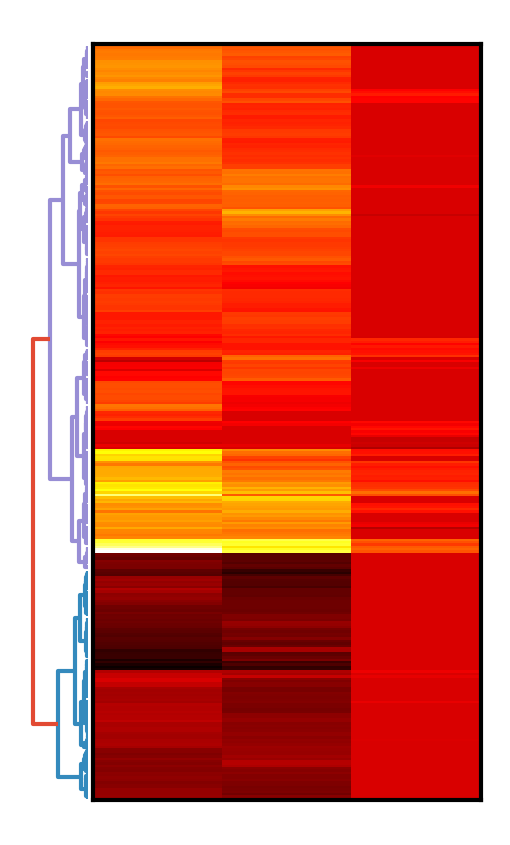

In [131]:
fig = plt.figure(figsize=(2, 4), dpi=300)
gs = GridSpec(3, 3,
           width_ratios=[1.5,10,0.25],
           height_ratios=[1.5,10,0.25],
           wspace=0.03,
           hspace=0.03)


ax2 = fig.add_subplot(gs[1,0], frameon=False)
Z2 = dendrogram(Z=gene_weighted_deg_link, color_threshold=None, leaf_rotation=45, no_labels = True , orientation='left', ax=ax2) # adding/removing the axes
ax2.set_xticks([])
ax2.set_yticks([])

axmatrix = fig.add_subplot(gs[1,1])
# norm=mpl.colors.Normalize(vmin=0, vmax=40)
im = axmatrix.matshow(reordered_data_subset, aspect='auto', origin='lower', cmap=plt.cm.hot, interpolation='none')

#ax_cbar = fig.add_subplot(gs[1,2])
#cbar = plt.colorbar(im , cax = ax_cbar)
#cbar.set_label('Gene Edge Weight' , rotation = -90, va='bottom' , fontsize = 9)

axmatrix.set_xticks([])
axmatrix.set_yticks([])

fig.tight_layout()
#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/FOR_CHANG_pairwise_SNP_distance/figures/isolates_genetic_aggl_clustered.pdf'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

### (ATB v HC) & (ATB v LTBI)

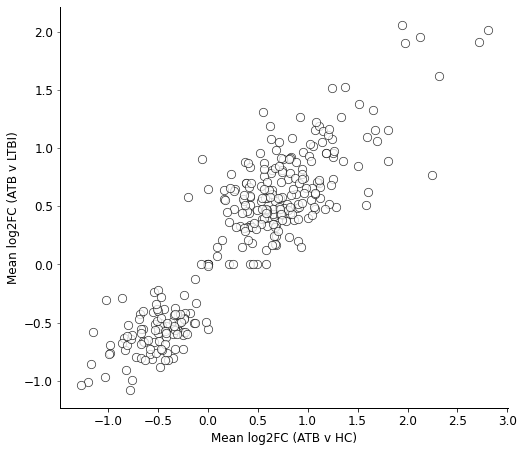

In [132]:
fig , ax = plt.subplots()

ax.scatter(mean_log2FC_df.ATB_HC, mean_log2FC_df.ATB_LTBI , color = 'white' , linewidth=0.75 , edgecolor = 'black' , s = 70 , alpha = 0.75)

#ax.set_title('ATB v LTBI', fontsize = 12, color = 'k')
ax.set_ylabel('Mean log2FC (ATB v LTBI)', fontsize = 12, color = 'k')
ax.set_xlabel('Mean log2FC (ATB v HC)' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.tick_params(labelcolor = 'k')
ax.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(7.5, 6.5)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/distribution_of_pairwise_SNP_distances.png'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()